# Lightweight cup thrown horizontally with a high backspin 

In [144]:
import numpy as np
import matplotlib.pyplot as plt

In [145]:
def Back_Spin(t,r):
    g=980 #cm/s^2
    l=2.76 #lambda
    w= 3.28
    
    v_inf = complex(0,g)/(complex(0,w)-l)
    v_0 = complex(1177,83)
    
    drdt = v_inf+(v_0-v_inf)*np.exp((complex(0,w)-l)*t)
    
    return np.array([drdt.real,drdt.imag])

In [146]:
def rk4(func,t,y): #t e y ingresan como vectores
    
    k1=func(t,y)
    k2=func(t+0.5*h , y+0.5*h*k1)
    k3=func(t+0.5*h , y+0.5*h*k2)
    k4=func(t+h,y+h*k3)
    
    value=y+h/6*(k1+2*k2+2*k3+k4)
    
    return value

#Condiciones iniciales
r0=[20,4.5]

In [149]:
t_ini=0
t_end=2
N=1000
h=(t_end-t_ini)/N

t_array=[]
for i in range(0,N+1):
    ti=t_ini+i*h
    t_array.append(ti)

sol=np.zeros((N,3))
sol[0][0]=t_array[0]
sol[0][1]=r0[0]
sol[0][2]=r0[1]

for i in range(1,N):
    sol[i][0]=t_array[i]
    ri=rk4(Back_Spin,sol[i-1][0],[sol[i-1][1],sol[i-1][2]])
    sol[i][1]=ri[0]
    sol[i][2]=ri[1]
    

Text(0, 0.5, 'y(cm)')

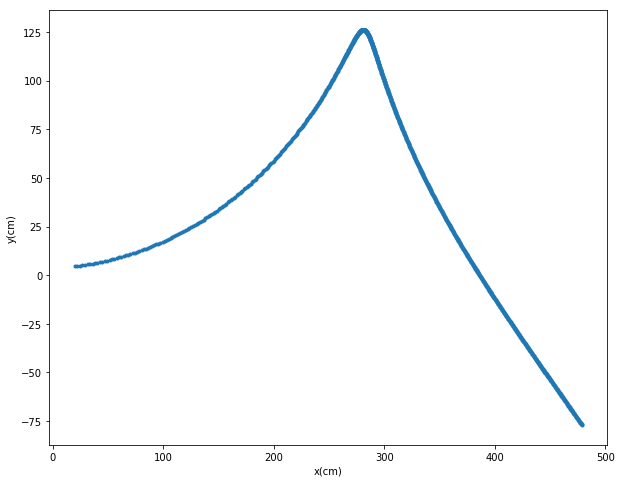

In [148]:
fig=plt.figure(figsize=(10,8))
ax=plt.axes()
ax=plt.plot(sol[:,1],sol[:,2],'.')
plt.xlabel('x(cm)')
plt.ylabel('y(cm)')
